In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing values in the dataset.

In [7]:
df.duplicated().sum()

0

There are no duplicated rows in the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1) All the Means of Mathscore, reading score and writing score are near to each other
2) Standard deviation for the 3 scores are ranging from the 14.6 to 15.19
3) Min scores are like Math- 0, reading - 17 and writing - 10
4) Max scores are like math, reading and writing are 100


In [16]:
print("Categories in 'gender' variable : ", end = " ")
print(df['gender'].unique())
print("\nCategories in 'race/ethnicity' variable : ", end = " ")
print(df['race/ethnicity'].unique())
print("\nCategories in 'parental level of education' variable : ", end = " ")
print(df['parental level of education'].unique())
print("\nCategories in 'lunch' variable : ", end = " ")
print(df['lunch'].unique())
print("\nCategories in 'test preparation course' variable : ", end = " ")
print(df['test preparation course'].unique())


Categories in 'gender' variable :  ['female' 'male']

Categories in 'race/ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable :  ['standard' 'free/reduced']

Categories in 'test preparation course' variable :  ['none' 'completed']


In [17]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O'] 

print('We have the {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have the {} numerical features: {}'.format(len(categorical_features), categorical_features))

We have the 3 numerical features: ['math score', 'reading score', 'writing score']
We have the 5 numerical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Right we are add the two more columns to our dataset. So that those our predictive features

In [19]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
reading_full = df[df['reading score'] == 100]['average score'].count()
print(f'No of students with full marks in reading: {reading_full}')
writing_full = df[df['writing score'] == 100]['average score'].count()
print(f'No of students with full marks in writing: {writing_full}')
math_full= df[df['math score'] == 100]['average score'].count()
print(f'No of students with full marks in math: {math_full}')

No of students with full marks in reading: 17
No of students with full marks in writing: 14
No of students with full marks in math: 7


In [28]:
readingscorels20 = df[df['reading score']<=20]['average score'].count()
writingscorels20 = df[df['writing score']<=20]['average score'].count()
mathscorels20 = df[df['math score']<=20]['average score'].count()
print(f'No of students with ls 20 marks in reading: {readingscorels20}')
print(f'No of students with ls 20 marks in writing: {writingscorels20}')
print(f'No of students with ls 20 marks in math: {mathscorels20}')

No of students with ls 20 marks in reading: 1
No of students with ls 20 marks in writing: 3
No of students with ls 20 marks in math: 4


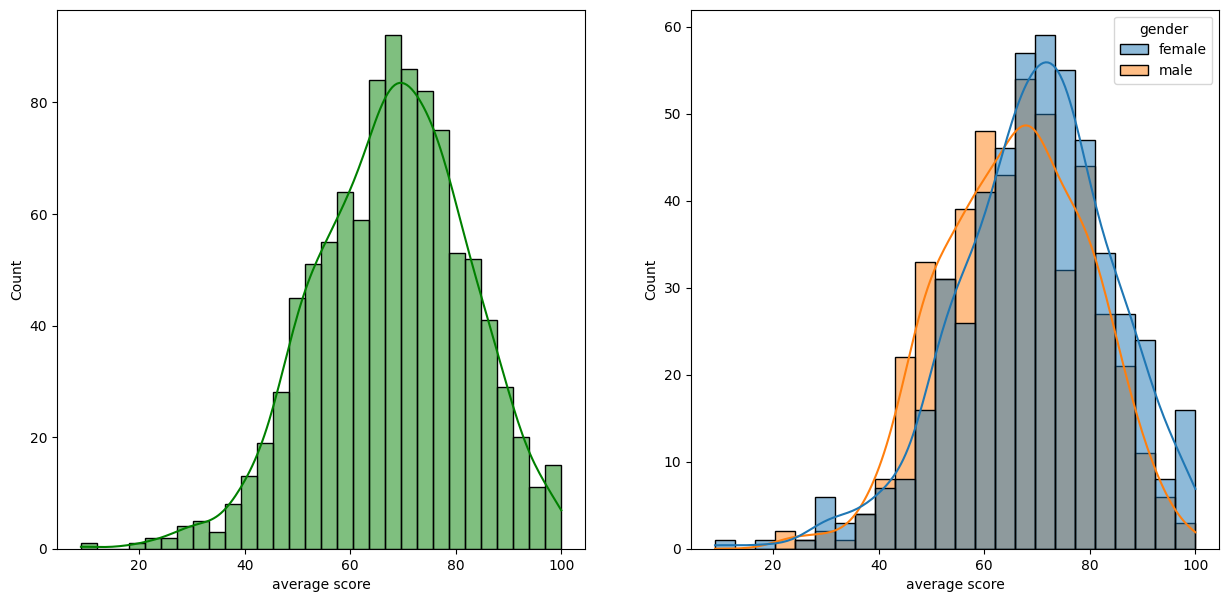

In [31]:
fig, axs = plt.subplots(1,2, figsize =(15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'average score', bins = 30, kde=True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average score', kde = True, hue = 'gender')
plt.show()

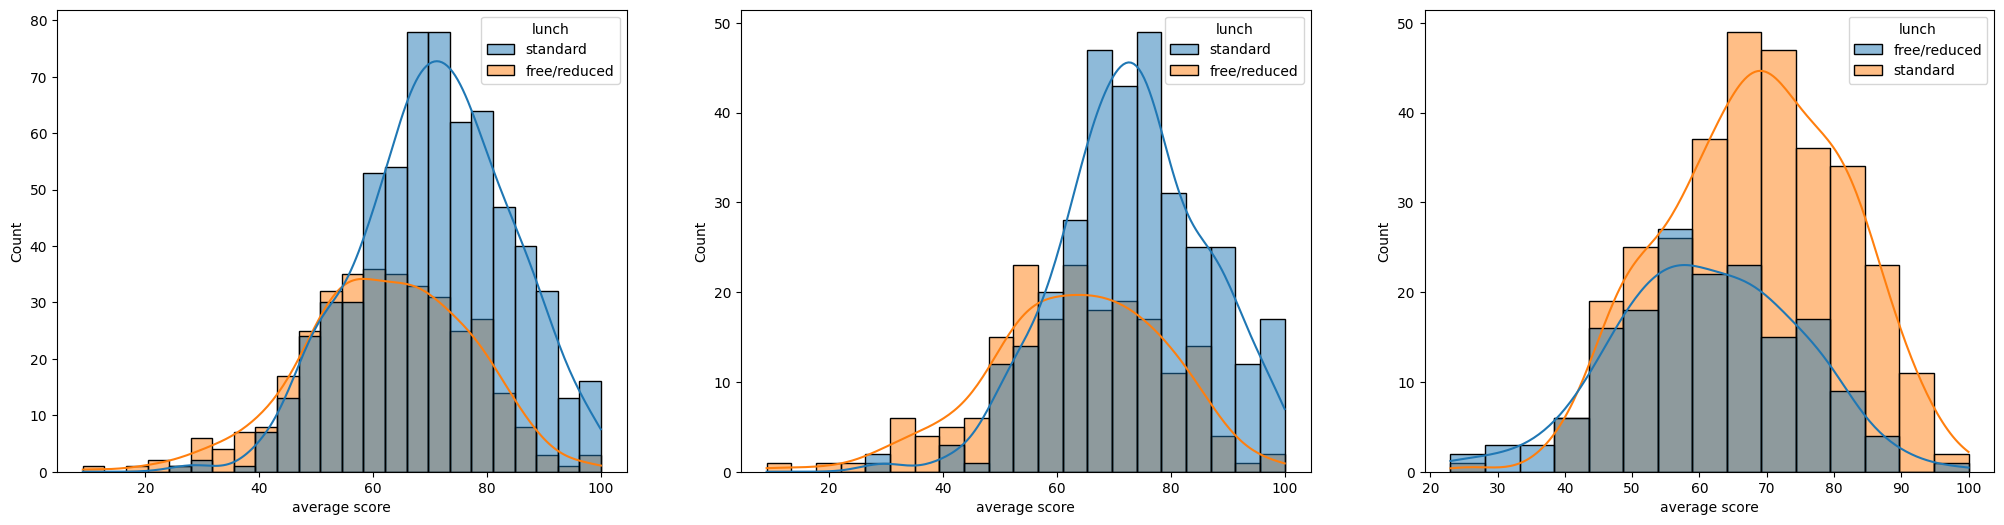

In [35]:
plt.subplots(1,3,figsize =(25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'average score', kde=True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x= 'average score', kde = True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df['gender']=='male'], x= 'average score', kde=True, hue = 'lunch')
plt.show()


<Axes: xlabel='average score', ylabel='Count'>

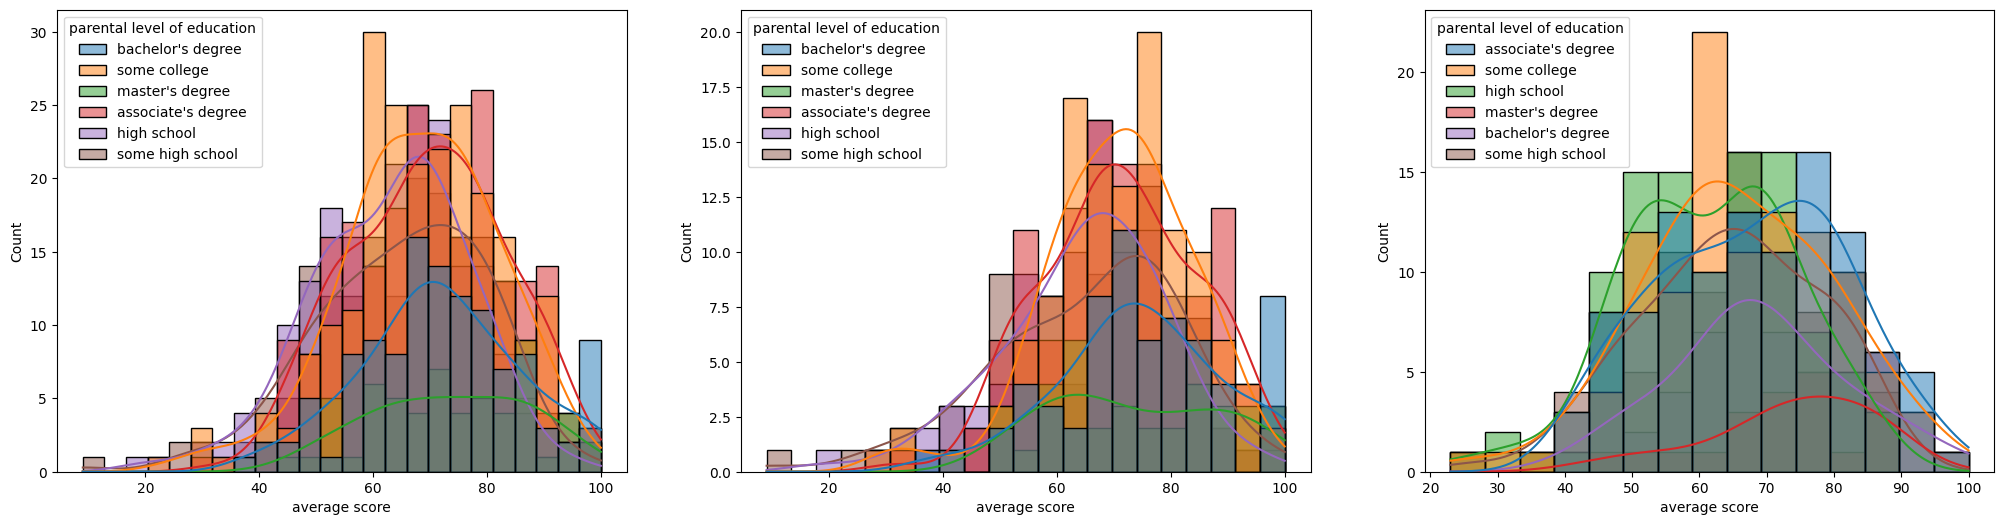

In [37]:
plt.subplots(1,3, figsize =(25,6))
plt.subplot(131)
sns.histplot(df, x='average score', kde=True, hue='parental level of education')
plt.subplot(132)
sns.histplot(df[df['gender']=='female'], x= 'average score', kde = True, hue='parental level of education')
plt.subplot(133)
sns.histplot(df[df['gender']=='male'], x= 'average score', kde = True, hue='parental level of education')

<Axes: xlabel='average score', ylabel='Count'>

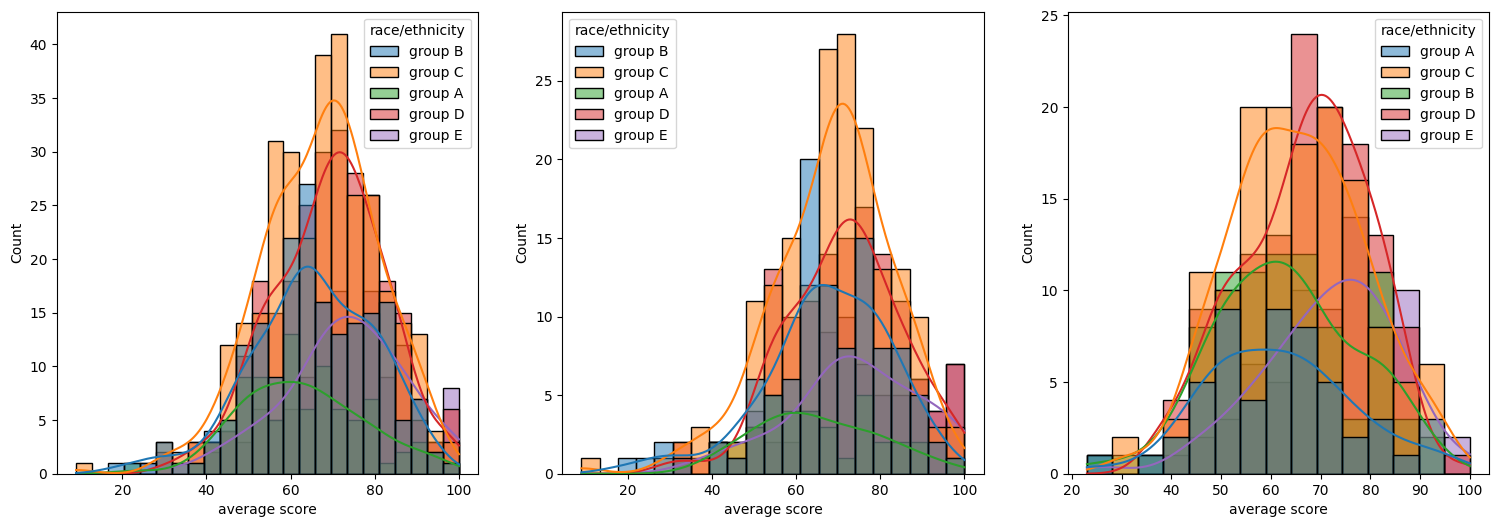

In [39]:
plt.subplots(1,3, figsize =(25,6))
plt.subplot(141)
sns.histplot(df, x='average score', kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(df[df['gender']=='female'], x= 'average score', kde = True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(df[df['gender']=='male'], x= 'average score', kde = True, hue='race/ethnicity')

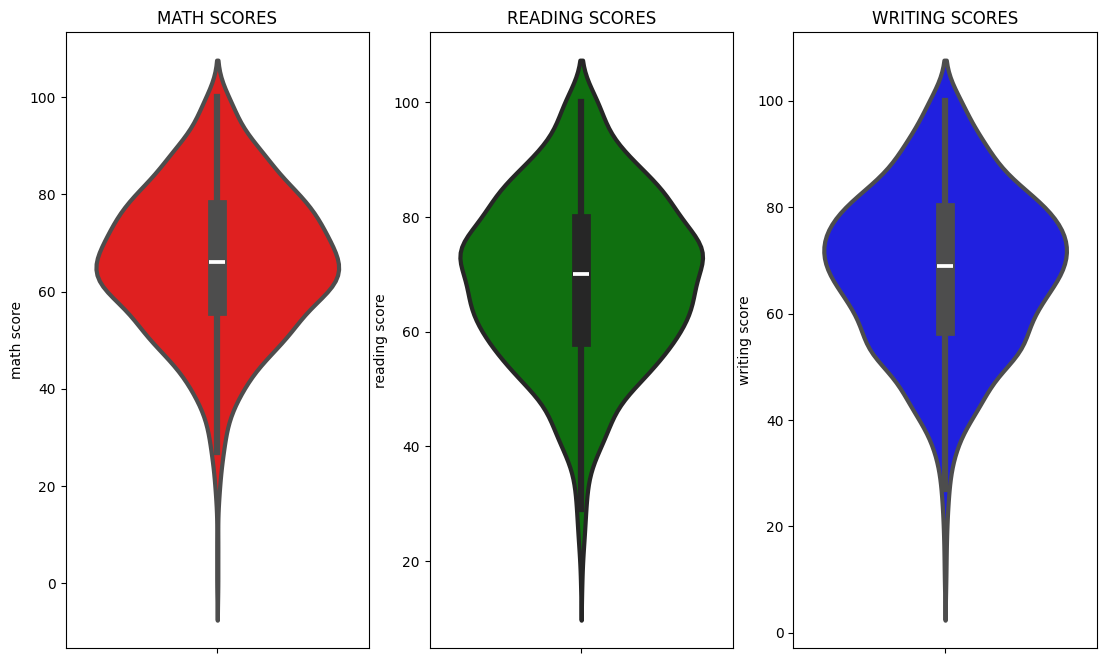

In [42]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

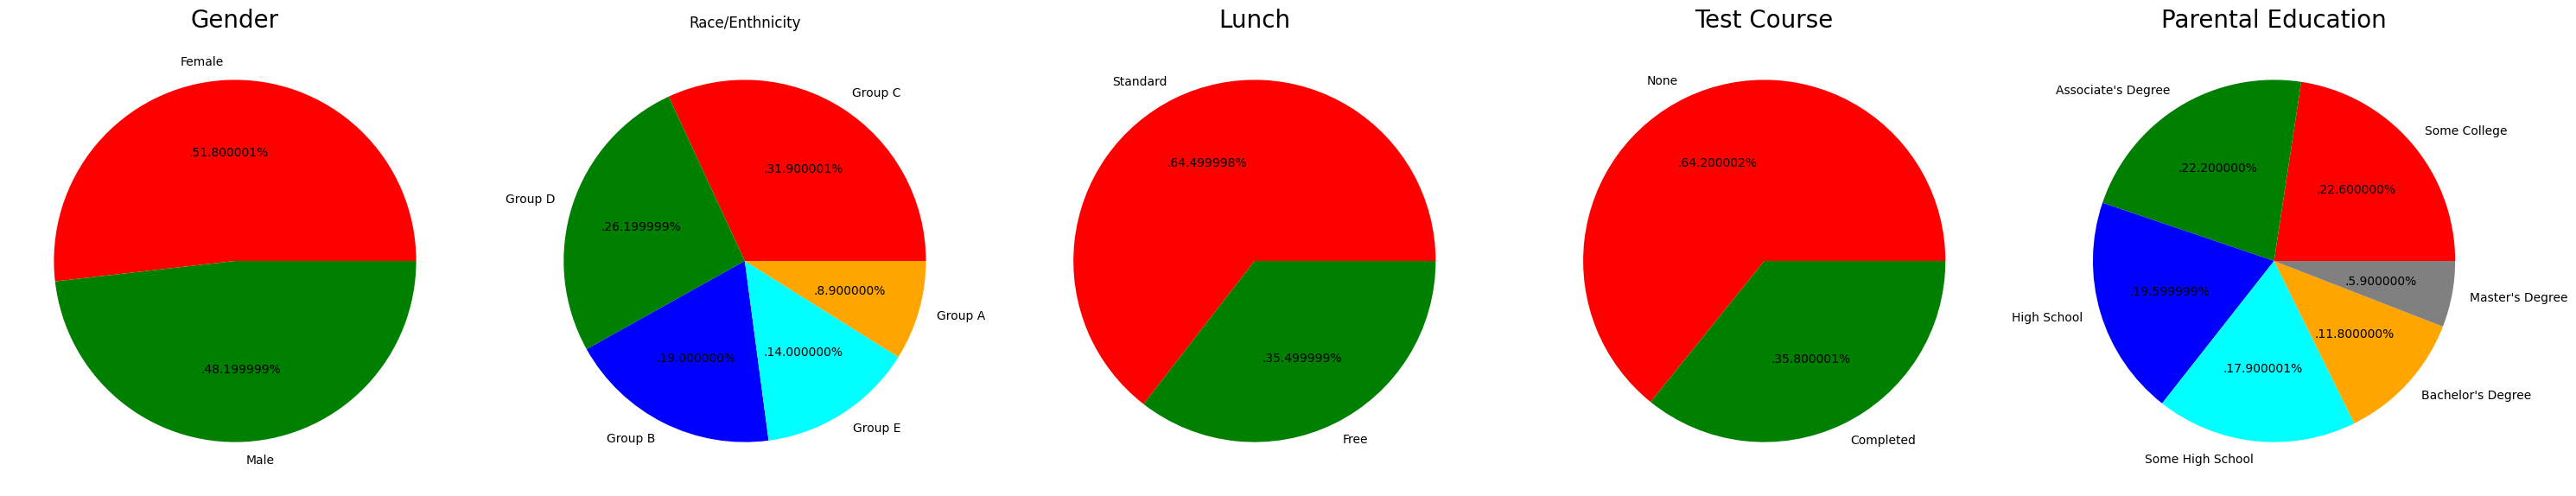

In [44]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
label = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = label, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
color = ['red', 'green', 'blue', 'cyan','orange']
label = ('Group C', 'Group D','Group B','Group E','Group A')

plt.pie(size, labels = label, colors = color, autopct='.%2f%%' )
plt.title('Race/Enthnicity')
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


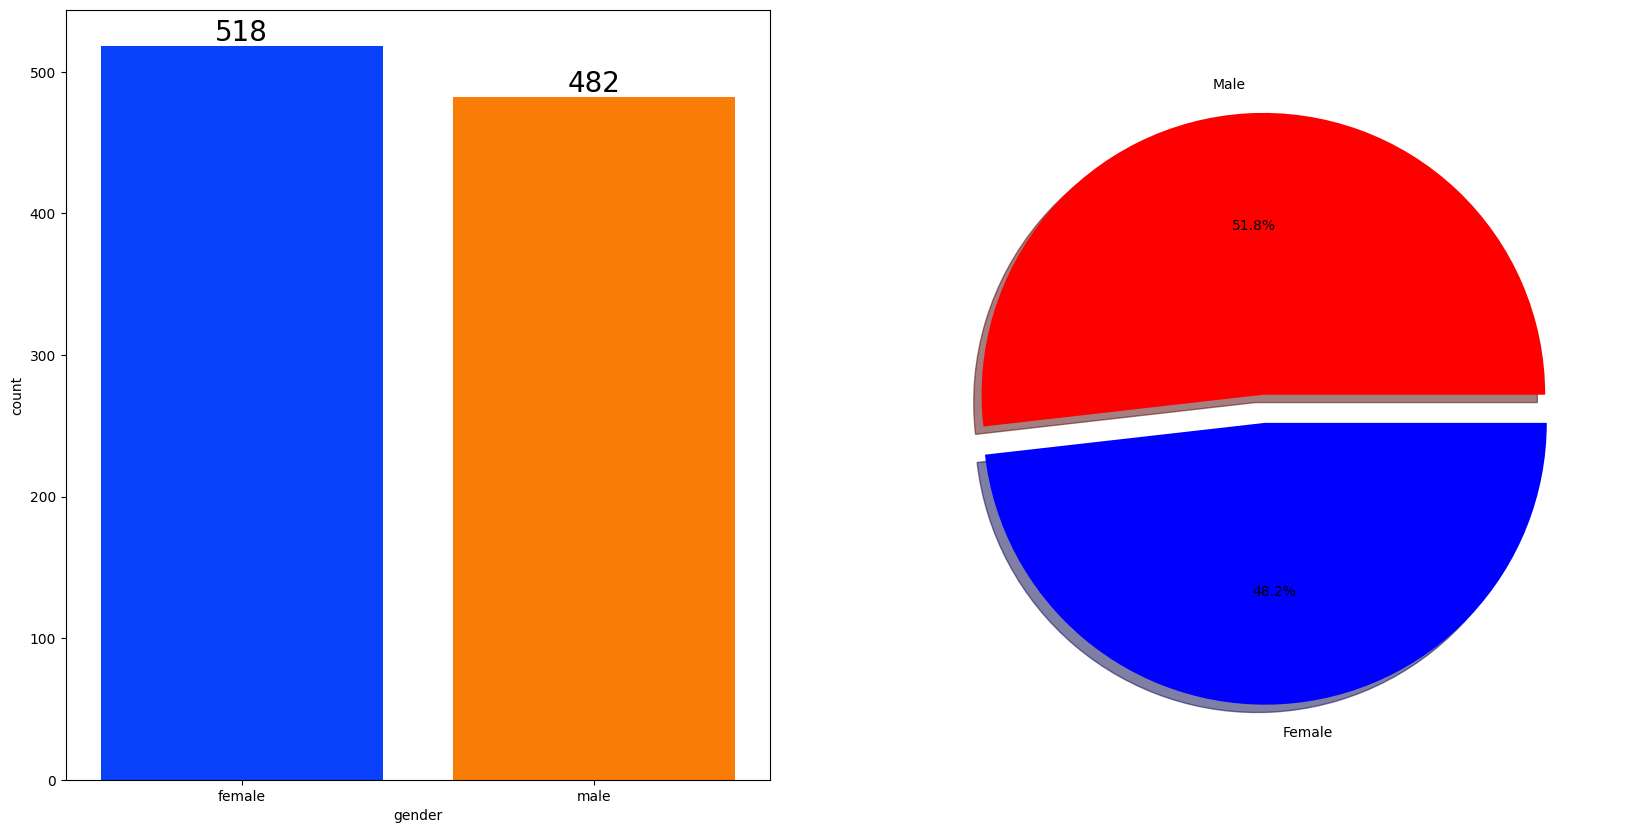

In [52]:
fig, ax = plt.subplots(1,2, figsize = (20, 10))
sns.countplot(x=df['gender'], ax = ax[0], palette='bright', saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
plt.pie(x = df['gender'].value_counts(), colors=['red', 'blue'], labels = ('Male', 'Female'), explode =[0,0.1], autopct='%1.1f%%', shadow = True)
plt.show()

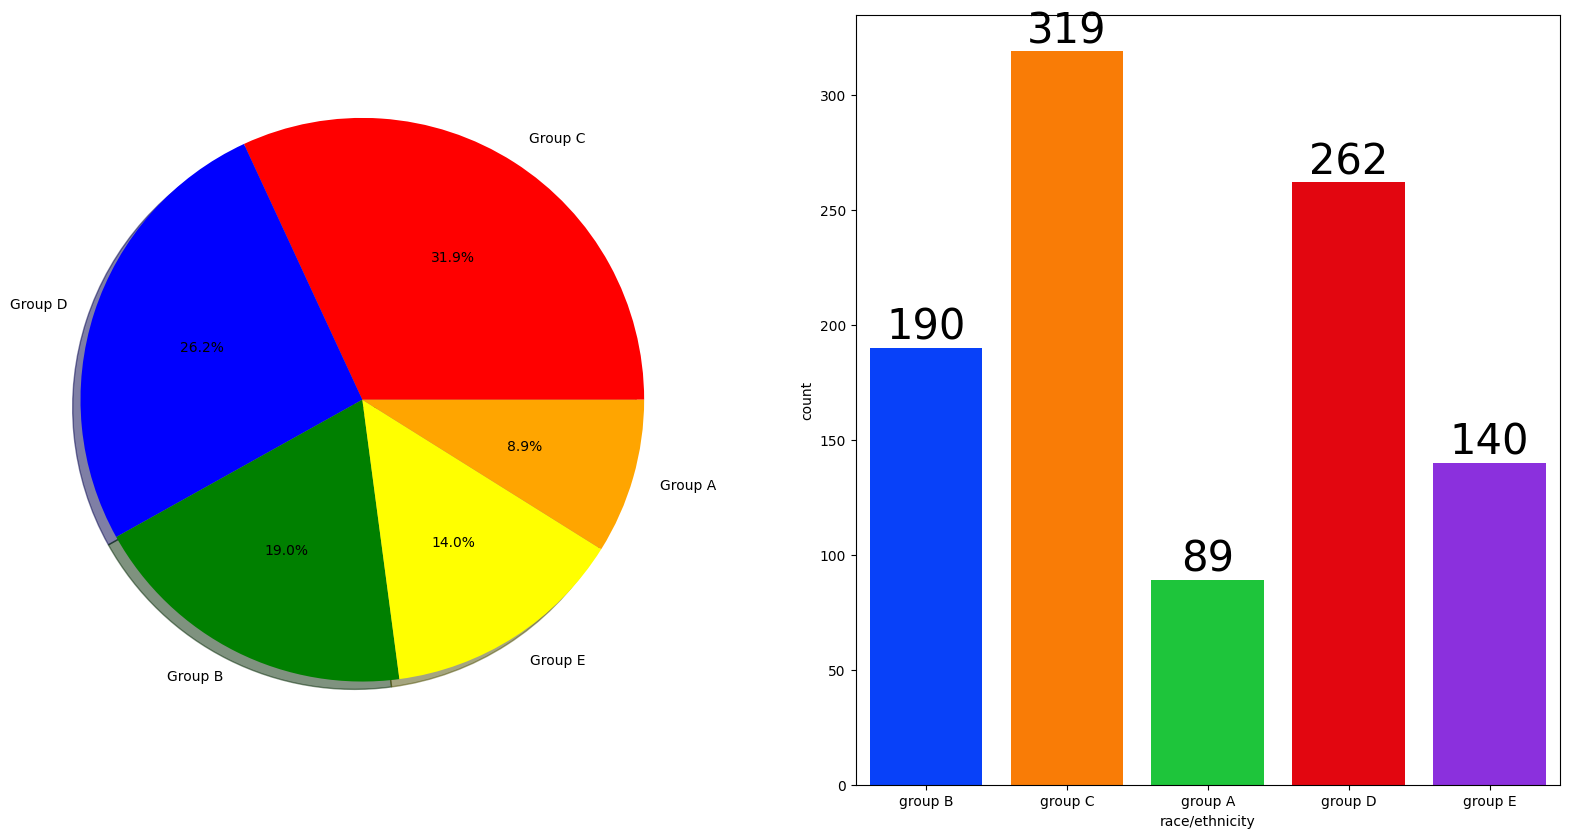

In [62]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='race/ethnicity', data=df, palette='bright', saturation=0.95, ax =ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 30)
plt.subplot(121)
plt.pie(x=df['race/ethnicity'].value_counts(), colors=['red', 'blue', 'green', 'yellow', 'orange'], labels=['Group C', 'Group D','Group B','Group E','Group A'],autopct='%1.1f%%', shadow = True)
plt.show()

In [63]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: Could not convert group Bgroup Cgroup Bgroup Bgroup Bgroup Bgroup Bgroup Agroup Cgroup Bgroup Cgroup Bgroup Cgroup Cgroup Dgroup Dgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Bgroup Egroup Agroup Cgroup Dgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Cgroup Cgroup Dgroup Agroup Dgroup Egroup Bgroup Cgroup Cgroup Dgroup Agroup Dgroup Cgroup Bgroup Egroup Dgroup Dgroup Dgroup Cgroup Dgroup Bgroup Bgroup Dgroup Dgroup Egroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Dgroup Cgroup Egroup Cgroup Dgroup Bgroup Cgroup Egroup Bgroup Egroup Egroup Cgroup Bgroup Bgroup Cgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Cgroup Egroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Bgroup Bgroup Bgroup Cgroup Egroup Cgroup Dgroup Cgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Dgroup Bgroup Egroup Cgroup Bgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Dgroup Egroup Dgroup Dgroup Cgroup Egroup Cgroup Dgroup Dgroup Bgroup Bgroup Egroup Cgroup Cgroup Bgroup Dgroup Bgroup Cgroup Cgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Cgroup Cgroup Bgroup Cgroup Bgroup Bgroup Dgroup Cgroup Bgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Cgroup Dgroup Agroup Dgroup Cgroup Dgroup Dgroup Dgroup Dgroup Agroup Bgroup Egroup Agroup Egroup Egroup Cgroup Dgroup Dgroup Cgroup Bgroup Cgroup Cgroup Agroup Dgroup Cgroup Cgroup Bgroup Dgroup Dgroup Cgroup Cgroup Dgroup Dgroup Agroup Cgroup Cgroup Agroup Cgroup Dgroup Agroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Dgroup Egroup Egroup Cgroup Cgroup Dgroup Agroup Cgroup Cgroup Cgroup Dgroup Bgroup Dgroup Dgroup Dgroup Bgroup Cgroup Agroup Cgroup Cgroup Cgroup Bgroup Cgroup Dgroup Bgroup Dgroup Bgroup Egroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Dgroup Egroup Dgroup Bgroup Cgroup Cgroup Dgroup Cgroup Cgroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Dgroup Agroup Cgroup Bgroup Cgroup Cgroup Bgroup Dgroup Cgroup Dgroup Egroup Dgroup Cgroup Cgroup Egroup Bgroup Bgroup Dgroup Dgroup Egroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Agroup Egroup Cgroup Cgroup Dgroup Dgroup Dgroup Cgroup Egroup Cgroup Cgroup Egroup Bgroup Cgroup Cgroup Agroup Cgroup Egroup Cgroup Egroup Cgroup Bgroup Cgroup Bgroup Dgroup Dgroup Dgroup Bgroup Egroup Bgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Bgroup Bgroup Dgroup Dgroup Cgroup Cgroup Cgroup Bgroup Cgroup Cgroup Cgroup Dgroup Bgroup Egroup Cgroup Dgroup Cgroup Egroup Cgroup Egroup Cgroup Dgroup Cgroup Dgroup Cgroup Agroup Dgroup Egroup Bgroup Dgroup Bgroup Dgroup Egroup Dgroup Bgroup Bgroup Cgroup Cgroup Cgroup Bgroup Egroup Dgroup Bgroup Cgroup Egroup Bgroup Agroup Cgroup Cgroup Cgroup Cgroup Egroup Dgroup Cgroup Dgroup Bgroup Bgroup Cgroup Dgroup Bgroup Cgroup Bgroup Bgroup Cgroup Agroup Dgroup Bgroup Bgroup Cgroup Bgroup Egroup Bgroup Cgroup Bgroup Dgroup Bgroup Egroup Egroup Cgroup Egroup Bgroup Cgroup Dgroup Egroup Cgroup Cgroup Agroup Bgroup Cgroup Agroup Dgroup Bgroup Cgroup Cgroup Cgroup Dgroup Agroup Cgroup Bgroup Cgroup Agroup Cgroup Dgroup Bgroup Dgroup Cgroup Agroup Egroup Bgroup Cgroup Cgroup Egroup Cgroup Cgroup Cgroup Dgroup Dgroup Egroup Bgroup Egroup Cgroup Egroup Dgroup Egroup Egroup Agroup Egroup Egroup Bgroup Dgroup Cgroup Agroup Dgroup Dgroup Dgroup Cgroup Agroup Cgroup Cgroup Bgroup Egroup Cgroup Cgroup Cgroup Bgroup Dgroup Cgroup Egroup Dgroup Bgroup Cgroup Dgroup Egroup Dgroup Egroup Cgroup Dgroup Dgroup Agroup Dgroup Egroup Cgroup Dgroup Egroup Bgroup Dgroup Agroup Dgroup Agroup Cgroup Cgroup Bgroup Agroup Cgroup Cgroup Agroup Dgroup Bgroup Dgroup Dgroup Egroup Cgroup Dgroup D to numeric